# Explicação do projeto

# Classe principal para reconhecimento

In [10]:
!pip install mtcnn lz4 deepface tf-keras --quiet

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mtcnn import MTCNN
from scipy.spatial.distance import cosine

from deepface import DeepFace


class FaceRecognizer:
    def __init__(self):
        # Modelo pré treinado para reconhecer rostos
        self.face_detector = MTCNN() #device="GPU:0"

    # Detectar rostos na imagem
    def extract_face_pixels(self, filename, required_size=(160, 160)):
        image = Image.open(filename)
        image = image.convert('RGB')
        pixels = np.asarray(image)
        results = self.face_detector.detect_faces(pixels)

        # Nenhum rosto detectado
        if len(results) == 0:
            return None

        # Extrair as coordenadas de cada rosto
        faces = []
        for result in results:
            x1, y1, width, height = result['box']
            x1, y1 = abs(x1), abs(y1)
            x2, y2 = x1 + width, y1 + height
            face = pixels[y1:y2, x1:x2]
            face = Image.fromarray(face)
            face = face.resize(required_size)
            face = np.asarray(face)
            faces.append(face)

        return faces

    # Extrair as características de um rosto
    def extract_embedding(self, face_pixels):
        embedding = DeepFace.represent(face_pixels, model_name='Facenet', enforce_detection=False)
        return embedding[0]["embedding"]

    def extract_dataset_embeddings(self, images_dir):
        embeddings = {}

        for filename in os.listdir(images_dir):
            filepath = os.path.join(images_dir, filename)

            if not (filename.endswith(".jpg") or filename.endswith(".jpeg")):
                continue

            face = self.extract_face_pixels(filepath)[0]
            if face is not None:
                embedding = self.extract_embedding(face)
                character_name = os.path.splitext(filename)[0]
                embeddings[character_name] = embedding

        self.character_embeddings = embeddings

    def recognize(self, face_embedding, threshold=0.5): 
        recognized_name = "Desconhecido"
        min_distance = float("inf")

        for name, db_embedding in self.character_embeddings.items():
            # Calcula a distancia vetorial
            distance = cosine(face_embedding, db_embedding) 
            if distance < threshold and distance < min_distance:
                recognized_name = name
                min_distance = distance

        return recognized_name


    def recognize_plot(self, filename):
        image = Image.open(filename)
        image = image.convert('RGB')
        pixels = np.asarray(image)

        faces = self.face_detector.detect_faces(pixels)

        plt.imshow(pixels)
        ax = plt.gca()
        
        # Detectar rostos na imagem
        for face in faces:
            x1, y1, width, height = face['box']
            x1, y1 = abs(x1), abs(y1)
            x2, y2 = x1 + width, y1 + height
            face = pixels[y1:y2, x1:x2]
            face = Image.fromarray(face)
            face = np.asarray(face)
            embedding = self.extract_embedding(face)
            name = self.recognize(embedding)

            label = f"{name}"
                
            # Desenhar retângulo
            rect = plt.Rectangle((x1, y1), width, height, fill=False, color='blue', linewidth=2)
            ax.add_patch(rect)
                
            # Adicionar o label
            plt.text(x1, y1 - 10, label, color='blue', fontsize=8, backgroundcolor='white')
            
        plt.axis('off')
        plt.show()


recognizer = FaceRecognizer()

2025-01-26 14:07:03.893146: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
images_folder = "./faces/"
test_folder = "./test/"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
7 rostos encontrados


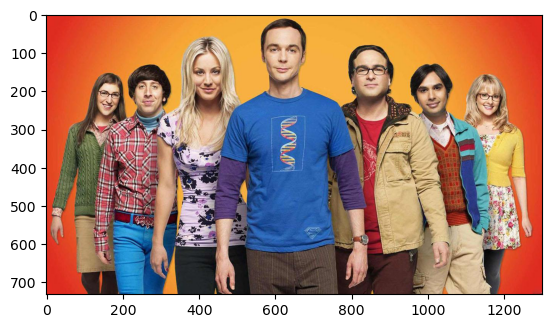

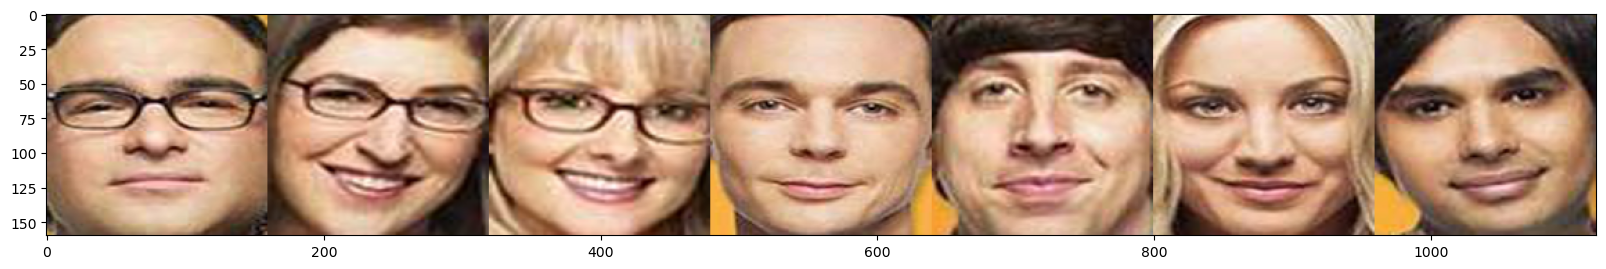

In [5]:
sample_path = os.path.join(test_folder, 'bigbangtheory.jpg')

image = Image.open(sample_path)
image = image.convert('RGB')
pixels = np.asarray(image)
plt.imshow(pixels)

images = recognizer.extract_face_pixels(sample_path)
print(f"{len(images)} rostos encontrados")

concat_image = np.concatenate([np.asarray(img) for img in images], axis=1)
plt.figure(figsize=(20,4))
plt.imshow(concat_image);

In [ ]:
recognizer.extract_dataset_embeddings(images_folder)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


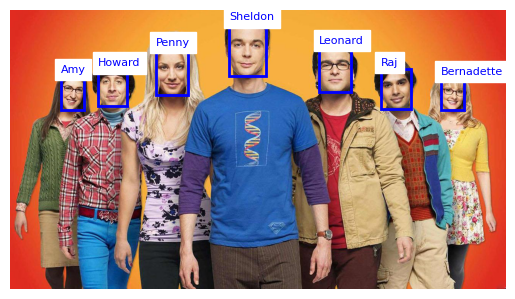

In [66]:
recognizer.recognize_plot(sample_path)